In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
table = pd.DataFrame(iris.data,columns=iris.feature_names)
table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
table['target'] = iris.target
table.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
x = table.drop(['target'], axis='columns')
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [5]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
classifier.score(X_test,y_test)

0.9777777777777777

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
classifier1 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=100)

In [9]:
classifier1.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=100)

In [10]:
classifier1.score(X_test,y_test)

0.9777777777777777

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01)

In [16]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [17]:
clf.score(X_test,y_test)

0.9777777777777777

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
estimators = [ 
    ('m1',RandomForestClassifier(n_estimators=5)),
    ('m2',SVC(probability=True)),
    ('m3',KNeighborsClassifier(n_neighbors=3)),
    ('m4',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=5)),
    ('m5',LogisticRegression()) 
]


In [23]:
final = VotingClassifier(estimators=estimators, voting='hard')

In [24]:
final.fit(X_train, y_train)

VotingClassifier(estimators=[('m1', RandomForestClassifier(n_estimators=5)),
                             ('m2', SVC()),
                             ('m3', KNeighborsClassifier(n_neighbors=3)),
                             ('m4',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=5)),
                             ('m5', LogisticRegression())])

In [25]:
for m in (final.estimators_):
    print (m.score(X_test,y_test))
    

0.9111111111111111
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [26]:
final.transform(X_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 2, 2, 2, 2],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [1, 2, 2, 2, 2],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [2, 2, 2, 2, 2],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [0, 0, 0,

In [31]:
estimators = [ 
    ('m1',RandomForestClassifier(n_estimators=5)),
    ('m2',SVC(probability=True)),
    ('m3',KNeighborsClassifier(n_neighbors=3)),
    ('m4',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=5)),
    ('m5',LogisticRegression()) 
]

In [32]:
final = VotingClassifier(estimators=estimators, voting='soft')
final.fit(X_train, y_train)

VotingClassifier(estimators=[('m1', RandomForestClassifier(n_estimators=5)),
                             ('m2', SVC(probability=True)),
                             ('m3', KNeighborsClassifier(n_neighbors=3)),
                             ('m4',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                                 n_estimators=5)),
                             ('m5', LogisticRegression())],
                 voting='soft')

In [33]:
for m in (final.estimators_):
    print(m.score(X_test,y_test))

0.9555555555555556
0.9777777777777777
0.9777777777777777
0.9777777777777777
0.9777777777777777


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
final.transform(X_test)

array([[0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.01359911e-02,
        2.92358344e-02, 9.60628174e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.22044605e-16, 2.22044605e-16, 1.00000000e+00,
        1.31643211e-04, 5.98405145e-02, 9.40027842e-01],
       [0.00000000e+00, 8.00000000e-01, 2.00000000e-01, 1.11844835e-02,
        9.79458865e-01, 9.35665107e-03, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 2.22044605e-16, 1.00000000e+00, 2.22044605e-16,
        1.33574175e-02, 9.57032687e-01, 2.96098951e-02],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.66333391e-01,
        2.06156706e-02, 1.30509383e-02, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 2.22044605e-16, 2.22044605e-16,
        9.82914247e-01, 1.70856974e-02, 5.56621552e-08],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.07503417e-02,
        5.30026937e-03, 9.83949389e-01, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 2.22044605e-1

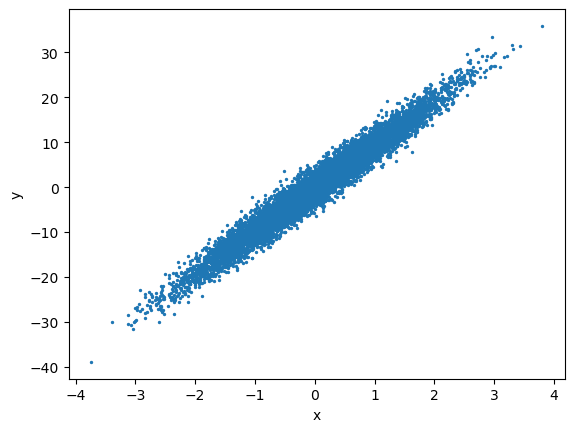

In [18]:
from sklearn.datasets import make_regression
x,y = make_regression(n_features=1, noise=2, n_samples=10000,random_state=0)
import matplotlib.pyplot as plt
plt.scatter(x,y,s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100)
reg.fit(x, y)

RandomForestRegressor()

In [20]:
reg.score(x, y)

0.9910792199680615

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)
reg.fit(x,y)

GradientBoostingRegressor(n_estimators=200)

In [27]:
reg.score(x, y)

0.9597966315621096